In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
	
# Bi-Annual Data Exposition: Every other year, at the Joint Statistical Meetings, the Graphics Section and the Computing Section join in sponsoring a special Poster Session called The Data Exposition , but more commonly known as The Data Expo. All of the papers presented in this Poster Session are reports of analyses of a common data set provided for the occasion. In addition, all papers presented in the session are encouraged to report the use of graphical methods employed during the developme nt of their analysis and to use graphics to convey their findings. Airline on-time performance: Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out. The data: The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigab ytes when uncompressed. The data comes originally from RITA where it is described in detail. You can download the data there, or from the bzipped csv files listed below. These files have derivable variables removed, are packaged in yearly chunks and have been more heavily compressed than the originals. Variable descriptions: Name Description 1 Year 1987-2008 2 Month 1-12 3 DayofMonth 1-31 4 DayOfWeek 1 (Monday) - 7 (Sunday) 5 DepTime actual departure time (local, hhm m) 6 CRSDepTime scheduled departure time (local, hhmm) 7 ArrTime actual arrival time (local, hhmm) 8 CRSArrTime scheduled arrival time (local, hhmm) 9 UniqueCarrier unique carrier code 10 FlightNum flight number 11 TailNum plane tail number 12 ActualElapsedTime in minutes 13 CRSElapsedTime in minutes 14 AirTime in minutes 15 ArrDelay arrival delay, in minutes 16 DepDelay departure delay, in minutes 17 Origin origin IATA airport code 18 Dest des tination IATA airport code 19 Distance in miles 20 TaxiIn taxi in time, in minutes 21 TaxiOut taxi out time in minutes 22 Cancelled was the flight cancelled? 23 CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 24 Diverted 1 = yes, 0 = no 25 CarrierDelay in minutes 26 WeatherDelay in minutes 27 NASDelay in minutes 28 SecurityDelay in minutes 29 LateAircraftDelay in minutes

In [2]:
#create Spark session
#spark = SparkSession.builder.appName('eda').getOrCreate()


In [3]:
# Spark 
# conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '5g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','8g')])


In [2]:
df = spark.read .csv("/user/lhy0814/data/dta.csv",inferSchema=True, header=True )



In [3]:
df.show(10)


+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1987|   10|        14|        3|  741.0|       730|  912.0|       849|           PS|     1451

In [8]:
df.summary()

DataFrame[summary: string, Year: string, Month: string, DayofMonth: string, DayOfWeek: string, DepTime: string, CRSDepTime: string, ArrTime: string, CRSArrTime: string, UniqueCarrier: string, FlightNum: string, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: string, TaxiIn: string, TaxiOut: string, Cancelled: string, CancellationCode: string, Diverted: string, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

In [13]:
df.dtypes


[('Year', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('DepTime', 'double'),
 ('CRSDepTime', 'int'),
 ('ArrTime', 'double'),
 ('CRSArrTime', 'int'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'double'),
 ('CRSElapsedTime', 'double'),
 ('AirTime', 'double'),
 ('ArrDelay', 'double'),
 ('DepDelay', 'string'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'double'),
 ('TaxiIn', 'double'),
 ('TaxiOut', 'double'),
 ('Cancelled', 'double'),
 ('CancellationCode', 'string'),
 ('Diverted', 'double'),
 ('CarrierDelay', 'double'),
 ('WeatherDelay', 'double'),
 ('NASDelay', 'double'),
 ('SecurityDelay', 'double'),
 ('LateAircraftDelay', 'double')]

In [5]:
df.select('Year').count()

123534969

In [9]:
df2=df.filter(F.col("Origin").cast("int").isNull())

In [9]:
df2.groupby("Origin").count().sort("count").orderBy(["count"], ascending=[0]).show(100)


+------+-------+
|Origin|  count|
+------+-------+
|   ORD|6598724|
|   ATL|6100880|
|   DFW|5711959|
|   LAX|4089229|
|   PHX|3491232|
|   DEN|3320115|
|   DTW|2979146|
|   IAH|2884647|
|   MSP|2754884|
|   SFO|2734052|
|   STL|2709179|
|   EWR|2706895|
|   LAS|2630917|
|   CLT|2546154|
|   LGA|2296746|
|   BOS|2291010|
|   PHL|2165067|
|   PIT|2072518|
|   SLC|2003182|
|   SEA|1983870|
|   MCO|1967351|
|   CVG|1923279|
|   DCA|1832692|
|   BWI|1717311|
|   SAN|1546648|
|   MIA|1448340|
|   CLE|1415858|
|   IAD|1336890|
|   JFK|1327863|
|   TPA|1321595|
|   MEM|1206781|
|   HOU|1205835|
|   BNA|1175095|
|   MCI|1174398|
|   MDW|1170329|
|   OAK|1160765|
|   SJC|1108090|
|   PDX|1054643|
|   RDU|1036676|
|   FLL|1013176|
|   MSY| 955329|
|   DAL| 952359|
|   IND| 824800|
|   SNA| 822058|
|   SMF| 813826|
|   SAT| 809777|
|   AUS| 803545|
|   ONT| 774645|
|   ABQ| 760298|
|   CMH| 759315|
|   BDL| 650889|
|   BUR| 580987|
|   PBI| 532339|
|   JAX| 520304|
|   ELP| 513665|
|   HNL| 51080

In [10]:
df3=df2.filter(F.col("Dest").cast("int").isNull())

In [11]:
df3.groupby("Dest").count().sort("count").orderBy(["count"], ascending=[1]).show(100)


+----+-----+
|Dest|count|
+----+-----+
| CBM|    1|
| LBF|    1|
| BFI|    1|
| SKA|    1|
| RCA|    1|
| GLH|    2|
| LAR|    2|
| BFF|    2|
| MKC|    2|
| FMN|    5|
| CKB|    6|
| PIR|    9|
| PVU|   11|
| CYS|   12|
| OGD|   19|
| RDR|   35|
| FOE|   57|
| MAZ|   84|
| MIB|   89|
| MTH|  127|
| BJI|  202|
| MKK|  288|
| INL|  290|
| LNY|  290|
| SOP|  317|
| MKG|  392|
| RHI|  444|
| KSM|  464|
| ANI|  472|
| OTH|  517|
| LMT|  567|
| ADK|  589|
| CMX|  628|
| TEX|  683|
| YAP|  692|
| HKY|  696|
| PLN|  775|
| ILG|  828|
| SLE|  880|
| RKS|  953|
| GCC| 1046|
| ROW| 1199|
| EWN| 1392|
| ALO| 1568|
| RFD| 1582|
| WYS| 1617|
| TTN| 1671|
| LWB| 1692|
| GST| 1787|
| ACK| 1825|
| HHH| 1833|
| YKM| 1846|
| ROP| 1919|
| VIS| 1982|
| TUP| 1983|
| EAU| 2113|
| ROR| 2368|
| VCT| 2434|
| LWS| 2753|
| PSE| 2929|
| TVL| 3306|
| PMD| 3352|
| EFD| 3646|
| SCK| 3664|
| CDC| 3878|
| APF| 3931|
| CCR| 4421|
| DLG| 4650|
| UCA| 4689|
| FLO| 5011|
| DUT| 5593|
| IPL| 5650|
| AKN| 5691|
| MQT| 5749|

In [12]:
df3.select('Origin').count()

122379717

In [13]:
122379717/123534969

0.9906483807026333

In [14]:
#Find the number of missing values for each column
from pyspark.sql.functions import isnan, when, count, col
df3.select([count(when(df3[c].isNull(), c)).alias(c) for c in df3.columns]).show()


+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+--------+-----------------+--------------+--------+--------+--------+------+----+--------+--------+--------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum| TailNum|ActualElapsedTime|CRSElapsedTime| AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|  TaxiIn| TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+--------+-----------------+--------------+--------+--------+--------+------+----+--------+--------+--------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|   0|    0|         0|        0|2104357|         0|2384266|         0|        

In [11]:
# missing value percentage
from pyspark.sql.functions import *

amount_missing_df = df3.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in df3.columns])
# amount_missing_df.show()

In [16]:
yiyi=amount_missing_df.toPandas()

In [17]:
yiyi


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,0.0,0.017195,0.0,0.019483,0.0,0.0,0.0,...,0.305584,0.305465,0.0,0.993997,0.0,0.720497,0.720497,0.720497,0.720497,0.720497


In [18]:
88174181/122379717

0.7204966898232

In [ ]:
# import pandas as pd
# df4 = df3.toPandas()

In [11]:
#df3.select('TailNum').distinct().show()

In [23]:
df3 = df3.drop('CRSDepTime', 'CRSArrTime', 'CRSElapsedTime')

In [24]:
df3 = df3.drop('TailNum', 'UniqueCarrier')

In [25]:
df3 = df3.dropna(subset=('DepTime','ArrTime','ActualElapsedTime','ArrDelay','Distance'))

In [12]:
import pandas as pd

In [34]:
pd.set_option('display.max_columns', None)

In [40]:
amount_missing_df = df3.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in df3.columns])
amount_missing_df.toPandas()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305006,0.0,0.0,0.0,0.0,0.0,0.305005,0.305005,0.0,1.0,0.0,0.720016,0.720016,0.720016,0.720016,0.720016


In [38]:
df3.select('Year').count()


119995451

In [27]:
columns = filter(lambda x: x != "Year", df3.columns)
df3.groupBy("Year").agg( * (sum(col(c).isNull().cast("int")).alias(c) for c in columns)).show()

+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+-------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|ArrTime|FlightNum|ActualElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance| TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+-------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1990|    0|         0|        0|      0|      0|        0|                0|5110527|       0|       0|     0|   0|       0|5110527|5110527|        0|         5110527|       0|     5110527|     5110527| 5110527|      5110527|          5110527|
|2003|    0|         0| 

In [28]:
pdf =df3.groupBy("Year").agg( * (sum(col(c).isNull().cast("int")).alias(c) for c in filter(lambda x: x != "Year", df3.columns)))

In [51]:
pdf.toPandas()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1990,0,0,0,0,0,0,0,5110527,0,0,0,0,0,5110527,5110527,0,5110527,0,5110527,5110527,5110527,5110527,5110527
1,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6375688,0,2619866,2619866,2619866,2619866,2619866
2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7275287,0,0,0,0,0,0
3,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7003802,0,0,0,0,0,0
4,1988,0,0,0,0,0,0,0,5126498,0,0,0,0,0,5126498,5126498,0,5126498,0,5126498,5126498,5126498,5126498,5126498
5,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5301999,0,5301999,5301999,5301999,5301999,5301999
6,1994,0,0,0,0,0,0,0,5078411,0,0,0,0,0,5078411,5078411,0,5078411,0,5078411,5078411,5078411,5078411,5078411
7,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6987722,0,0,0,0,0,0
8,1991,0,0,0,0,0,0,0,4995005,0,0,0,0,0,4995005,4995005,0,4995005,0,4995005,4995005,4995005,4995005,4995005
9,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5209326,0,5209326,5209326,5209326,5209326,5209326


## 1987~1994 has no airtime/taxi in /taxi out values. so we only focus on 1995~

In [13]:
df1995 = df3.filter(df3.Year.cast("int") >=1995)
df

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: double, CRSDepTime: int, ArrTime: double, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: double, CRSElapsedTime: double, AirTime: double, ArrDelay: double, DepDelay: string, Origin: string, Dest: string, Distance: double, TaxiIn: double, TaxiOut: double, Cancelled: double, CancellationCode: string, Diverted: double, CarrierDelay: double, WeatherDelay: double, NASDelay: double, SecurityDelay: double, LateAircraftDelay: double]

In [14]:
pdf2 =df1995.groupBy("Year").agg( * (sum(col(c).isNull().cast("int")).alias(c) for c in filter(lambda x: x != "Year", df1995.columns)))

In [15]:
pd1995 =pdf2.toPandas()

In [16]:
pd1995.sort_values(by=['Year'])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7,1995,0,0,0,91905,0,102397,0,0,0,...,0,0,0,5327435,0,5327435,5327435,5327435,5327435,5327435
5,1996,0,0,0,128536,0,142657,0,0,0,...,0,0,0,5351983,0,5351983,5351983,5351983,5351983,5351983
3,1997,0,0,0,97763,0,109844,0,0,0,...,0,0,0,5411843,0,5411843,5411843,5411843,5411843,5411843
6,1998,0,0,0,144509,0,157670,0,0,0,...,0,0,0,5384721,0,5384721,5384721,5384721,5384721,5384721
12,1999,0,0,0,154311,0,167866,0,0,0,...,0,0,0,5527884,0,5527884,5527884,5527884,5527884,5527884
10,2000,0,0,0,187490,0,201744,0,0,0,...,0,0,0,5683047,0,5683047,5683047,5683047,5683047,5683047
8,2001,0,0,0,41589,0,52231,0,0,0,...,0,0,0,4925262,0,4925262,4925262,4925262,4925262,4925262
13,2002,0,0,0,56973,0,65163,0,0,0,...,0,0,0,5158625,0,5158625,5158625,5158625,5158625,5158625
0,2003,0,0,0,101469,0,112850,0,0,0,...,0,0,0,6435446,0,2672742,2672742,2672742,2672742,2672742
4,2004,0,0,0,127757,0,141541,0,0,0,...,0,0,0,7001506,0,0,0,0,0,0


In [17]:
df1995 = df1995.dropna(subset=('AirTime'))

## two parts of analysis direction:
* use 1995~2008, analysis without delay reason (flight frequency,.... )
* use 2004~2007, analysis of delay reason

In [18]:
df_final = df1995.drop('CancellationCode') # the huge dataset

In [19]:
df_final_delay = df_final.filter((df_final.Year.cast("int") >=2004) & (df_final.Year.cast("int") <=2007) )

In [36]:
df_final_delay.head()

Row(Year=2004, Month=1, DayofMonth=12, DayOfWeek=1, DepTime=623.0, ArrTime=901.0, FlightNum=462, ActualElapsedTime=98.0, AirTime=80.0, ArrDelay=-14.0, DepDelay='-7.0', Origin='ORD', Dest='CLT', Distance=599.0, TaxiIn=7.0, TaxiOut=11.0, Cancelled=0.0, Diverted=0.0, CarrierDelay=0.0, WeatherDelay=0.0, NASDelay=0.0, SecurityDelay=0.0, LateAircraftDelay=0.0)

In [47]:
df_final_delay.show(10)

+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|ArrTime|FlightNum|ActualElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+-------+---------+-----------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+
|2004|    1|        12|        1|  623.0|  901.0|      462|             98.0|   80.0|   -14.0|    -7.0|   ORD| CLT|   599.0|   7.0|   11.0|      0.0|     0.0|         0.0|         0.0|     0.0|          0.0|              0.0|
|2004|    1|        13|        2|  621.0|  911.0|      462|            110.0|   78.0|    -4.0|  

In [51]:
df_final_delay.dtypes


[('Year', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('DepTime', 'double'),
 ('ArrTime', 'double'),
 ('FlightNum', 'int'),
 ('ActualElapsedTime', 'double'),
 ('AirTime', 'double'),
 ('ArrDelay', 'double'),
 ('DepDelay', 'string'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'double'),
 ('TaxiIn', 'double'),
 ('TaxiOut', 'double'),
 ('Cancelled', 'double'),
 ('Diverted', 'double'),
 ('CarrierDelay', 'double'),
 ('WeatherDelay', 'double'),
 ('NASDelay', 'double'),
 ('SecurityDelay', 'double'),
 ('LateAircraftDelay', 'double')]

In [62]:
# DepDelay to double
df_final_delay2=df_final_delay.withColumn("DepDelay",df_final_delay.DepDelay.cast('double'))

In [63]:
df_final_delay2.dtypes


[('Year', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('DepTime', 'double'),
 ('CRSDepTime', 'int'),
 ('ArrTime', 'double'),
 ('CRSArrTime', 'int'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'double'),
 ('CRSElapsedTime', 'double'),
 ('AirTime', 'double'),
 ('ArrDelay', 'double'),
 ('DepDelay', 'double'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'double'),
 ('TaxiIn', 'double'),
 ('TaxiOut', 'double'),
 ('Cancelled', 'double'),
 ('Diverted', 'double'),
 ('CarrierDelay', 'double'),
 ('WeatherDelay', 'double'),
 ('NASDelay', 'double'),
 ('SecurityDelay', 'double'),
 ('LateAircraftDelay', 'double')]

In [72]:
#get the ArrTime with only hour

from pyspark.sql.functions import substring, length, col, expr
df_final_delay3 = df_final_delay2.withColumn("ArrTime2",expr("substring(ArrTime, 1, length(ArrTime)-4)"))
df_final_delay3.show(10)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+--------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|ArrTime2|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+--------+
|2004|    1|        12|        1|  623.0|       630|  901.0|       915|           UA|      462| N805UA|             98

In [73]:
#get the DepTime with only hour

from pyspark.sql.functions import substring, length, col, expr
df_final_delay4 = df_final_delay3.withColumn("DepTime2",expr("substring(DepTime, 1, length(DepTime)-4)"))
df_final_delay4.show(10)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+--------+--------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|ArrTime2|DepTime2|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+--------+--------+
|2004|    1|        12|        1|  623.0|       630|  901.0|       915|           UA|      

In [85]:
df_final_delay5 = df_final_delay4.filter((df_final_delay4.ArrTime2<=24) & (df_final_delay4.DepTime2<=24))

## Cannelled exploration

In [52]:
dfc = df_final_delay.groupby("Cancelled").count()
dfc.show()

+---------+--------+
|Cancelled|   count|
+---------+--------+
|      0.0|28259657|
+---------+--------+



In [53]:
dfcc = df.groupby("Cancelled").count()
dfcc.show()

+---------+---------+
|Cancelled|    count|
+---------+---------+
|      0.0|120274172|
|     null|  1155252|
|      1.0|  2105545|
+---------+---------+



In [54]:
dfccc = df_final.groupby("Cancelled").count()
dfccc.show()

+---------+--------+
|Cancelled|   count|
+---------+--------+
|      0.0|83255584|
+---------+--------+



In [55]:
dfcancel = df1995.groupby("CancellationCode").count()
dfcancel.show()

+----------------+--------+
|CancellationCode|   count|
+----------------+--------+
|            null|83255574|
|               B|       3|
|               C|       1|
|               A|       6|
+----------------+--------+



([<matplotlib.patches.Wedge at 0x7f1a7af87390>,
 [Text(-0.0594273,1.09839,'Cancelled'),
  Text(0.0594274,-1.09839,'Not_Cancelled')],
 [Text(-0.0324149,0.599124,'1.7%'), Text(0.0324149,-0.599124,'98.3%')])

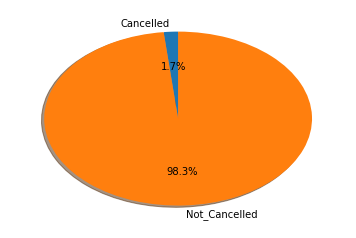

In [66]:
labels = 'Cancelled', 'Not_Cancelled'
sizes = [2105545,120274172]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

#### Most of the flights are not cancelled

In [3]:
dfcancel=df.filter(df.Cancelled == '1.0')

In [60]:
dfcancel_Month2 = dfcancel.groupby("Month").count().sort("count").orderBy(["count"], ascending=[0])
dfcancel_Month2.show()

+-----+------+
|Month| count|
+-----+------+
|    1|301756|
|   12|239558|
|    2|231362|
|    3|197778|
|    9|181759|
|    7|157595|
|    8|156117|
|    6|153804|
|   10|128173|
|   11|122171|
|    5|119240|
|    4|116232|
+-----+------+



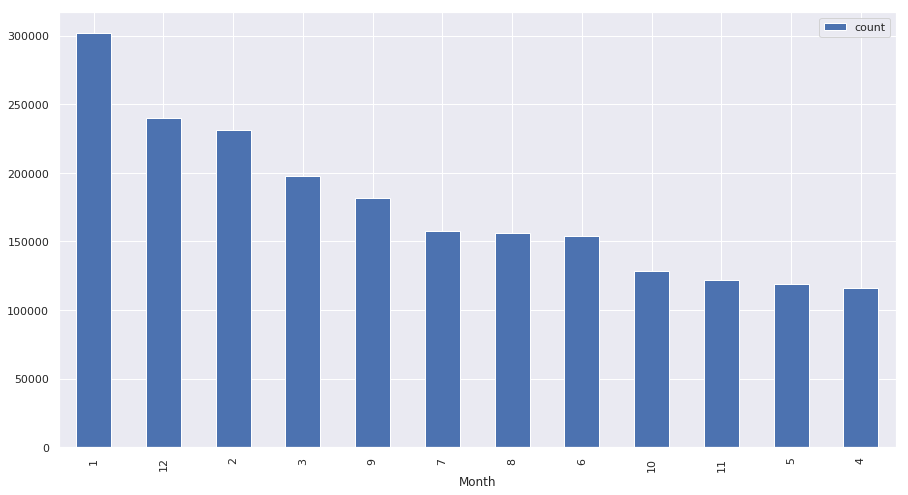

In [73]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

pdfcancel_Month = dfcancel_Month2.toPandas()
pdfcancel_Month.plot(kind= 'bar', x='Month')

#### Flights are more likely to be cancelled during Jan, Dec, Feb, and I assume the reason is the bad weather(Snow) in winter. 

In [74]:
dfcancel_DayOfWeek = dfcancel.groupby("DayOfWeek").count().sort("count").orderBy(["count"], ascending=[0])
dfcancel_DayOfWeek.show()

+---------+------+
|DayOfWeek| count|
+---------+------+
|        2|340536|
|        3|326892|
|        4|323270|
|        1|320027|
|        5|312707|
|        6|243039|
|        7|239074|
+---------+------+



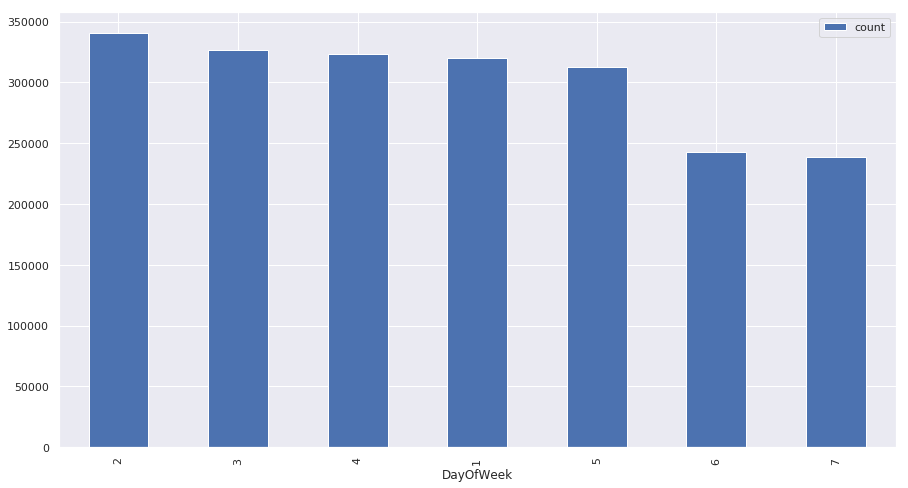

In [75]:
pdfcancel_DayOfWeek = dfcancel_DayOfWeek.toPandas()
pdfcancel_DayOfWeek.plot(kind= 'bar', x='DayOfWeek')

#### Flights are more likely to be cancelled during weekdays, so we should buy flights during weekend

In [4]:
dfcancel_carrier = dfcancel.groupby("UniqueCarrier").count().sort("count").orderBy(["count"], ascending=[0])
dfcancel_carrier.show()

+-------------+------+
|UniqueCarrier| count|
+-------------+------+
|           US|259988|
|           UA|255559|
|           DL|254418|
|           AA|253051|
|           NW|208321|
|           WN|135963|
|           MQ|120242|
|           CO|101947|
|           OO| 65390|
|           TW| 63342|
|           XE| 51991|
|           AS| 50756|
|           HP| 48939|
|           EV| 48676|
|           OH| 47174|
|           YV| 30050|
|           EA| 28702|
|           DH| 22176|
|           9E| 15039|
|           FL| 12854|
+-------------+------+
only showing top 20 rows



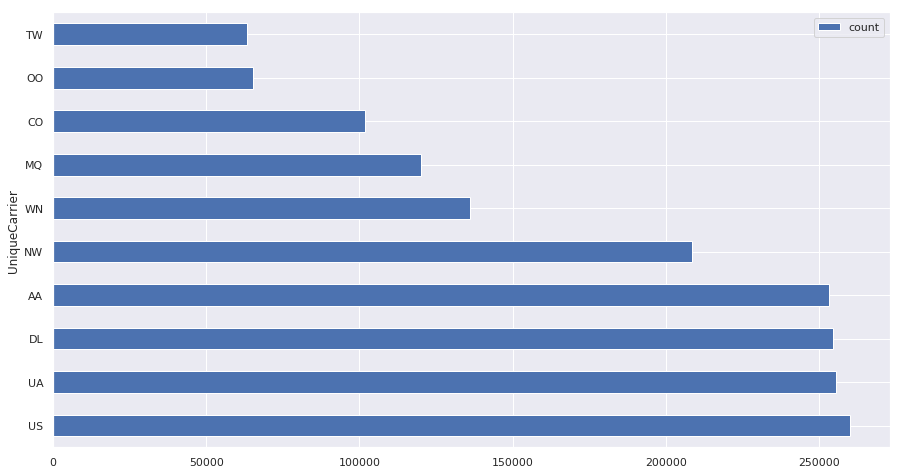

In [8]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

pdfcancel_carrier = dfcancel_carrier.limit(10).toPandas()
pdfcancel_carrier.plot(kind= 'barh', x='UniqueCarrier')

#### Dont book flights from US, UA, DL, AA, and NW since they have higher probability to cancel their flights

## Delay exploration

In [ ]:
# CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|

In [ ]:
df_final_delay

In [81]:
df123 = df_final_delay.groupby("CarrierDelay").count().sort("count").orderBy(["count"], ascending=[0])
df123.show()

+------------+--------+
|CarrierDelay|   count|
+------------+--------+
|         0.0|25496585|
|        15.0|  103686|
|         6.0|   91005|
|         7.0|   88767|
|        10.0|   85650|
|         8.0|   82507|
|         5.0|   80825|
|        16.0|   79930|
|        17.0|   74951|
|         9.0|   74762|
|         4.0|   71279|
|         3.0|   70537|
|         2.0|   70281|
|        18.0|   68918|
|        20.0|   68497|
|         1.0|   66016|
|        11.0|   63674|
|        19.0|   62029|
|        12.0|   61083|
|        13.0|   57677|
+------------+--------+
only showing top 20 rows



In [82]:
df_final_delay.filter(df_final_delay.CarrierDelay != '0.0').count()

2763072

In [83]:
df_final_delay.filter(df_final_delay.WeatherDelay != '0.0').count()

468969

In [84]:
df_final_delay.filter(df_final_delay.NASDelay != '0.0').count()

3781938

In [85]:
df_final_delay.filter(df_final_delay.SecurityDelay != '0.0').count()

34727

In [86]:
df_final_delay.filter(df_final_delay.LateAircraftDelay != '0.0').count()

2794793

([<matplotlib.patches.Wedge at 0x7f1a72cb1668>,
 [Text(-0.849105,0.6993,'CarrierDelay'),
  Text(-1.03608,-0.369498,'WeatherDelay'),
  Text(0.140924,-1.09094,'NASDelay'),
  Text(1.07246,-0.244587,'SecurityDelay'),
  Text(0.856141,0.690668,'LateAircraftDelay')],
 [Text(-0.463148,0.381437,'28.1%'),
  Text(-0.565137,-0.201544,'4.8%'),
  Text(0.0768679,-0.595056,'38.4%'),
  Text(0.58498,-0.133411,'0.4%'),
  Text(0.466986,0.376728,'28.4%')])

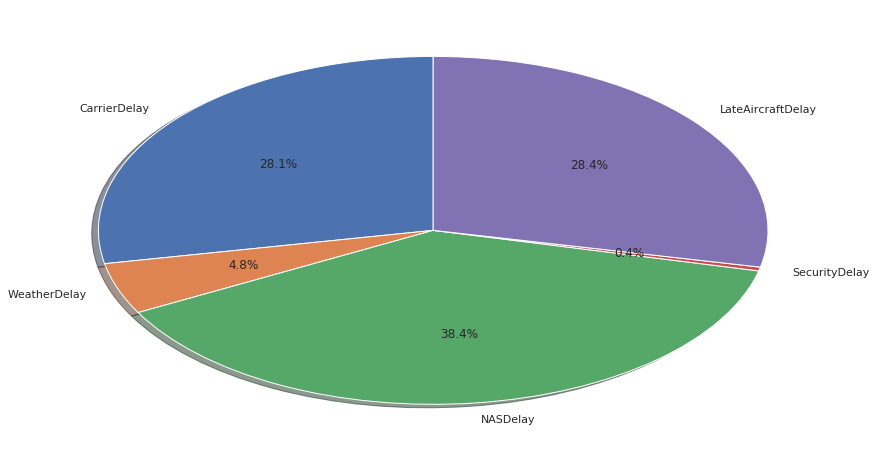

In [87]:
labels = 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
sizes = [2763072,468969, 3781938, 34727, 2794793]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

#### Most of the delay are CarrierDelay, NASDelay, and LateAircraftDelay

In [89]:
df_final_delay.select('ArrDelay','DepDelay').show(10)

+--------+--------+
|ArrDelay|DepDelay|
+--------+--------+
|   -14.0|    -7.0|
|    -4.0|    -9.0|
|     5.0|     3.0|
|   -16.0|    -3.0|
|     3.0|     5.0|
|   -10.0|    -2.0|
|    29.0|    20.0|
|   -11.0|    -3.0|
|   -12.0|    -7.0|
|   -14.0|    -4.0|
+--------+--------+
only showing top 10 rows



In [91]:
pdf_delay=df_final_delay.select('ArrDelay','DepDelay')

In [39]:
dfcancel_arrdelay = df.groupby("ArrDelay").count().sort("count").orderBy(["count"], ascending=[0])
dfcancel_arrdelay.show(10)

+--------+-------+
|ArrDelay|  count|
+--------+-------+
|     0.0|5303349|
|    -5.0|4701008|
|    -2.0|4238175|
|    -3.0|4236497|
|    -4.0|4030217|
|    -1.0|3820012|
|    -6.0|3770291|
|    -7.0|3733607|
|    -8.0|3459977|
|     2.0|3383757|
+--------+-------+
only showing top 10 rows



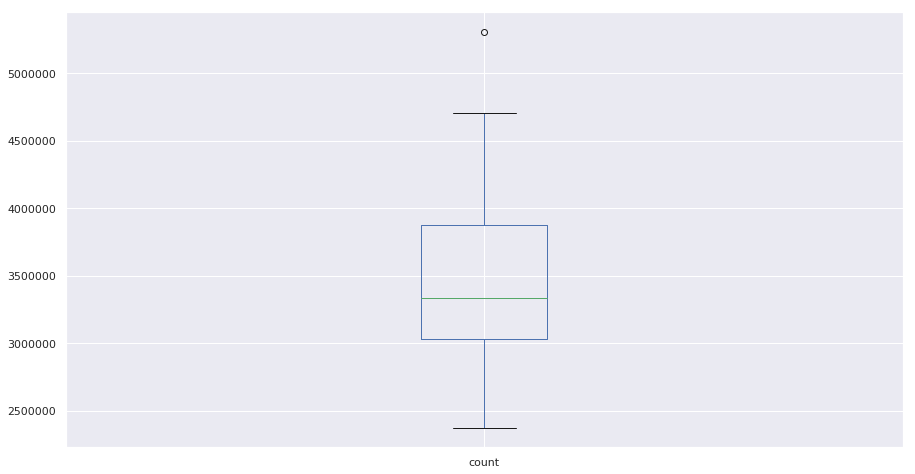

In [53]:
#dfcancel_arrdelay = dfcancel.groupby("ArrDelay").count()
pdfcancel_arrdelay = dfcancel_arrdelay.limit(20).toPandas()
pdfcancel_arrdelay.plot(kind= 'box', x='ArrDelay')

In [64]:
from pyspark.ml.stat import Correlation
df_final_delay2.stat.corr("ArrDelay", "DepDelay")


0.9176318435630544

#### As expected Arrivial delay and depearture delay are highly correlation. If the flight took off late, it would definitely arrive late.

In [66]:
df_final_delay2.stat.corr("ArrDelay", "Distance")


-0.0066462124974421034

In [68]:
arr_carr = df_final_delay2.stat.corr("ArrDelay", "CarrierDelay")
arr_late = df_final_delay2.stat.corr("ArrDelay", "LateAircraftDelay")
arr_nas = df_final_delay2.stat.corr("ArrDelay", "NASDelay")
print(arr_carr)
print(arr_late)
print(arr_nas)

0.5595652016721928
0.6041634159857664
0.5093929058612798


#### ArrDelay are most related to LateAircraftDelay

In [83]:
dfdelay_time = df_final_delay5.groupby("ArrTime2").count().sort("count").orderBy(["count"], ascending=[0])
dfdelay_time.show()

+--------+-------+
|ArrTime2|  count|
+--------+-------+
|      16|1881985|
|      10|1809005|
|      17|1802954|
|      18|1791470|
|      19|1784716|
|      12|1776270|
|      14|1758636|
|      20|1746654|
|      11|1730403|
|      13|1682924|
|      15|1678700|
|      21|1618863|
|       9|1609351|
|      22|1383156|
|       8|1350291|
|       7| 946328|
|      23| 899662|
|       6| 305417|
|       5| 146649|
|       1| 112119|
+--------+-------+
only showing top 20 rows



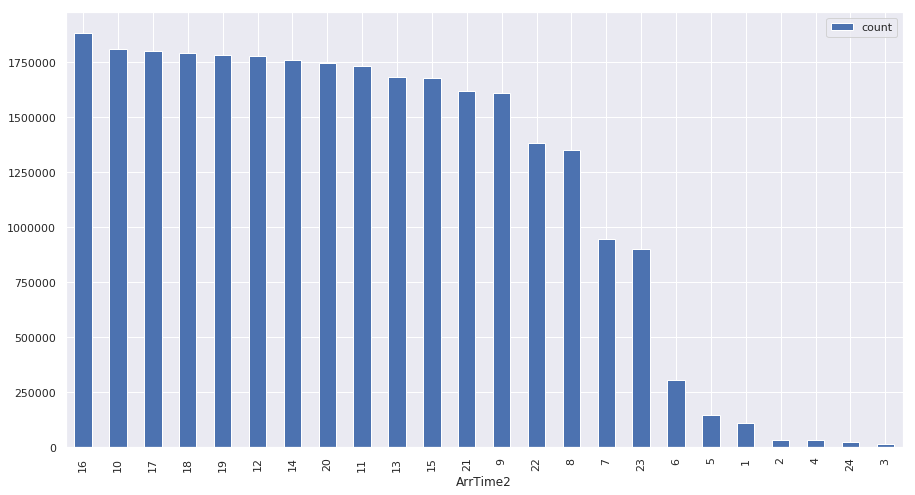

In [84]:
pdfdelay_time = dfdelay_time.toPandas()
pdfdelay_time.plot(kind= 'bar', x='ArrTime2')

#### Flights are more likely to delay in the afternoon

In [ ]:
# [('Year', 'int'),
#  ('Month', 'int'),
#  ('DayofMonth', 'int'),
#  ('DayOfWeek', 'int'),
#  ('DepTime', 'double'),
#  ('CRSDepTime', 'int'),
#  ('ArrTime', 'double'),
#  ('CRSArrTime', 'int'),
#  ('UniqueCarrier', 'string'),
#  ('FlightNum', 'int'),
#  ('TailNum', 'string'),
#  ('ActualElapsedTime', 'double'),
#  ('CRSElapsedTime', 'double'),
#  ('AirTime', 'double'),
#  ('ArrDelay', 'double'),
#  ('DepDelay', 'double'),
#  ('Origin', 'string'),
#  ('Dest', 'string'),
#  ('Distance', 'double'),
#  ('TaxiIn', 'double'),
#  ('TaxiOut', 'double'),
#  ('Cancelled', 'double'),
#  ('Diverted', 'double'),
#  ('CarrierDelay', 'double'),
#  ('WeatherDelay', 'double'),
#  ('NASDelay', 'double'),
#  ('SecurityDelay', 'double'),
#  ('LateAircraftDelay', 'double')]

In [ ]:
# using scatter plot
#plt.figure(figsize=[14.70, 8.27])

#sns.regplot(data=pdf_delay, x='DepDelay', y='ArrDelay')#, fit_reg=True, scatter_kws={'alpha':1/10}, x_jitter=0.03)

# # axes labels and title
# plt.xlabel('Departure Delay (min)', fontsize = 10, weight = "bold")
# plt.ylabel('Arrival Delay (min)', fontsize = 10, weight = "bold")
# plt.title('Relationship between Arrival delay and the Departure delay', fontsize = 14, weight = "bold")

# plt.show()

In [ ]:
# y_ans_val = [val.ans_val for val in df_final_delay.select('ArrDelay').collect()]
# x_ts = [val.timestamp for val in df_final_delay.select('DepDelay').collect()]

# plt.plot(x_ts, y_ans_val)

In [ ]:
# from IPython.display import display, HTML, display_html #usefull to display wide tables
# from pyspark_dist_explore import Histogram, hist, distplot, pandas_histogram
# from pyspark.sql import Row
# from pyspark_dist_explore import hist
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# hist(ax, df.select('ArrDelay'), bins = 20, color=['red'])

In [ ]:
#sns.boxplot(df_final_delay.'ArrDelay')

In [5]:
df.select('Year').count()

123534969

In [10]:
df.select('Origin').distinct().count()

347

In [11]:
df.select('Dest').distinct().count()

1464

In [12]:
df.select('Origin').count()

123534969

In [13]:
df.select('Dest').count()

123534969

In [21]:
from pyspark.sql.functions import isnan, when, count, col
df.select(count(when(df['Origin'].isNull(),"Origin"))).show()


+-------------------------------------------------+
|count(CASE WHEN (Origin IS NULL) THEN Origin END)|
+-------------------------------------------------+
|                                                0|
+-------------------------------------------------+



In [22]:
df.select(count(when(df['Dest'].isNull(),"Dest"))).show()


+---------------------------------------------+
|count(CASE WHEN (Dest IS NULL) THEN Dest END)|
+---------------------------------------------+
|                                            0|
+---------------------------------------------+



In [26]:
#df.select([count(when(df[c].isNull(), c)).alias(c) for c in ["Origin","Dest"]).show()


In [25]:
df.select(count(when(df['LateAircraftDelay'].isNull(),"LateAircraftDelay"))).show()

+-----------------------------------------------------------------------+
|count(CASE WHEN (LateAircraftDelay IS NULL) THEN LateAircraftDelay END)|
+-----------------------------------------------------------------------+
|                                                               89329433|
+-----------------------------------------------------------------------+



In [29]:
df.filter(df.Origin == 'SAN').count()

1546648

In [31]:
df.filter(df.Dest == 'SAN').count()

1525447

In [32]:
df.filter(df.Origin == 'ORD').count()

6598724

In [33]:
df.filter(df.Dest == 'ORD').count()

6586369

In [34]:
df.groupby("Origin").count().sort("count").orderBy(["count"], ascending=[1]).show(100)


+------+-----+
|Origin|count|
+------+-----+
|   BFI|    1|
|   MKC|    1|
|   BFF|    1|
|   CYS|    2|
|   GLH|    2|
|   PVU|    2|
|   FMN|    3|
|   OGD|    6|
|   CKB|    8|
|   PIR|   10|
|   RDR|   46|
|   FOE|   57|
|   MIB|   89|
|   MTH|  128|
|   MAZ|  146|
|   BJI|  202|
|   LNY|  289|
|   MKK|  289|
|   INL|  290|
|   SOP|  319|
|   MKG|  396|
|   RHI|  444|
|   KSM|  467|
|   ANI|  475|
|   OTH|  515|
|   LMT|  569|
|   ADK|  589|
|   CMX|  627|
|   HKY|  648|
|   TEX|  683|
|   YAP|  709|
|   PLN|  776|
|   ILG|  794|
|   SLE|  884|
|   RKS|  954|
|   GCC| 1046|
|   ROW| 1196|
|   EWN| 1392|
|   RFD| 1560|
|   ALO| 1564|
|   WYS| 1632|
|   LWB| 1677|
|   TTN| 1687|
|   ACK| 1812|
|   HHH| 1833|
|   YKM| 1863|
|   GST| 1889|
|   ROP| 1958|
|   TUP| 1971|
|   VIS| 1993|
|   EAU| 2167|
|   ROR| 2228|
|   VCT| 2445|
|   LWS| 2752|
|   PSE| 2883|
|   TVL| 3314|
|   PMD| 3370|
|   EFD| 3633|
|   SCK| 3717|
|   CDC| 3856|
|   APF| 4074|
|   CCR| 4465|
|   UCA| 4639|
|   DLG| 4

In [35]:
df.groupby("Dest").count().sort("count").orderBy(["count"], ascending=[1]).show(100)


+----+-----+
|Dest|count|
+----+-----+
| 669|    1|
|  21|    1|
| LBF|    1|
|2027|    1|
| RCA|    1|
| CBM|    1|
|1017|    1|
| SKA|    1|
|  80|    1|
| 865|    1|
|1728|    1|
| BFI|    1|
|3370|    1|
|1225|    1|
|3386|    1|
| 169|    1|
| 655|    2|
|2021|    2|
|1626|    2|
|1007|    2|
| LAR|    2|
| BFF|    2|
|  30|    2|
|1546|    2|
| MKC|    2|
| 720|    2|
| GLH|    2|
|3266|    3|
|1520|    3|
|  55|    3|
| 769|    3|
|2404|    4|
| 896|    4|
|2986|    4|
|  78|    4|
|2936|    4|
|1559|    4|
| 776|    4|
|1839|    4|
| 740|    5|
| 848|    5|
| FMN|    5|
|1052|    5|
|4129|    5|
|1725|    5|
| 990|    5|
| 673|    6|
|1497|    6|
|2237|    6|
| 688|    6|
|1333|    6|
|1455|    6|
|2335|    6|
|2447|    6|
|2466|    6|
|1312|    6|
|2367|    6|
|4962|    6|
| 993|    6|
| 904|    6|
|1283|    6|
|1864|    6|
| CKB|    6|
|1136|    6|
|1204|    6|
|1048|    7|
| 727|    7|
|3711|    7|
|1180|    7|
|1634|    7|
|1342|    7|
| 928|    7|
|1624|    7|
|1959|    7|

In [40]:
df.groupby("Dest").count().sort("count").orderBy(["count"], ascending=[1]).show(1000)


+----+-----+
|Dest|count|
+----+-----+
|1225|    1|
| 669|    1|
| CBM|    1|
| SKA|    1|
|1728|    1|
|2027|    1|
|1017|    1|
| LBF|    1|
|3370|    1|
|  21|    1|
| 169|    1|
| RCA|    1|
| BFI|    1|
|3386|    1|
| 865|    1|
|  80|    1|
|2021|    2|
| BFF|    2|
|1007|    2|
| MKC|    2|
| 720|    2|
| GLH|    2|
|1546|    2|
|1626|    2|
|  30|    2|
| LAR|    2|
| 655|    2|
|  55|    3|
|3266|    3|
|1520|    3|
| 769|    3|
|2986|    4|
| 896|    4|
|1839|    4|
|  78|    4|
|1559|    4|
|2936|    4|
| 776|    4|
|2404|    4|
| 740|    5|
| FMN|    5|
|1725|    5|
|1052|    5|
| 990|    5|
| 848|    5|
|4129|    5|
|1136|    6|
|1312|    6|
|2335|    6|
|1204|    6|
| 904|    6|
|1864|    6|
|4962|    6|
|2367|    6|
|2466|    6|
|1497|    6|
| 993|    6|
|2237|    6|
|1333|    6|
|2447|    6|
| 688|    6|
| 673|    6|
|1283|    6|
|1455|    6|
| CKB|    6|
| 727|    7|
|2615|    7|
|1618|    7|
|  45|    7|
| 928|    7|
|1180|    7|
|1624|    7|
|1111|    7|
|1048|    7|

In [42]:
df.groupby("Dest").count().sort("count").orderBy(["count"], ascending=[0]).show(1400)


+----+-------+
|Dest|  count|
+----+-------+
| ORD|6586369|
| ATL|6067769|
| DFW|5722237|
| LAX|4053421|
| PHX|3398469|
| DEN|3308500|
| DTW|2953157|
| IAH|2879132|
| MSP|2719159|
| SFO|2703881|
| STL|2697769|
| EWR|2694417|
| LAS|2587302|
| CLT|2519680|
| LGA|2268009|
| BOS|2265128|
| PHL|2129746|
| PIT|2048605|
| SLC|1994130|
| MCO|1949735|
| SEA|1926086|
| CVG|1917428|
| DCA|1808740|
| BWI|1693971|
| SAN|1525447|
| MIA|1440448|
| CLE|1410391|
| IAD|1327144|
| JFK|1322975|
| TPA|1307142|
| HOU|1208774|
| MEM|1196146|
| BNA|1172087|
| MDW|1166070|
| MCI|1162917|
| OAK|1148318|
| SJC|1091702|
| RDU|1035257|
| PDX|1027364|
| FLL|1001574|
| DAL| 954307|
| MSY| 945394|
| IND| 815451|
| SNA| 804277|
| SMF| 803298|
| SAT| 802058|
| AUS| 795618|
| ONT| 764110|
| ABQ| 752715|
| CMH| 747626|
| BDL| 640369|
| BUR| 574486|
| PBI| 525606|
| JAX| 514644|
| ELP| 509478|
| HNL| 507595|
| RNO| 504211|
| BUF| 483498|
| OKC| 478543|
| TUL| 467350|
| SDF| 457828|
| SJU| 457140|
| MKE| 440267|
| PVD| 435